In [1]:
!cp /content/drive/MyDrive/ERA/S8/utils.py /content
!cp /content/drive/MyDrive/ERA/S8/model.py /content

In [2]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn as nn
import model
import utils

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")

CUDA Available? True


In [4]:
train_transforms = transforms.Compose([

      transforms.RandomHorizontalFlip(),
      # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
      transforms.ToTensor(),
      transforms.Normalize((0.49, 0.48, 0.44), (0.24, 0.24, 0.26))
      ])
 # Test data transformations
test_transforms = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((0.49, 0.48, 0.44), (0.24, 0.24, 0.26))
      ])

train_data = datasets.CIFAR10('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.CIFAR10('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 170498071/170498071 [00:02<00:00, 83554548.95it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


In [5]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)


Sample Data

dog   horse dog   frog  deer  bird  car   truck deer  car   ship  truck plane horse frog  frog  frog  dog   car   dog   horse horse deer  dog   ship  dog   frog  cat   plane deer  bird  dog   dog   deer  bird  cat   truck frog  horse cat   car   car   bird  cat   car   horse car   cat   truck car   frog  truck truck frog  dog   cat   deer  plane cat   bird  frog  deer  frog  car  


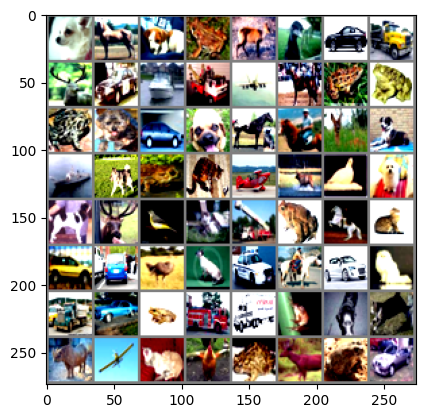

In [6]:
utils.plot_data(data_loader=train_loader,batch=batch_size)

Modelling

In [7]:
nn_model = model.Net_Layer()
model.model_summary(nn_model, device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 32, 32]             540
         LayerNorm-2           [-1, 20, 32, 32]           2,048
              ReLU-3           [-1, 20, 32, 32]               0
         Dropout2d-4           [-1, 20, 32, 32]               0
            Conv2d-5           [-1, 20, 32, 32]           3,600
         LayerNorm-6           [-1, 20, 32, 32]           2,048
              ReLU-7           [-1, 20, 32, 32]               0
         Dropout2d-8           [-1, 20, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             320
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           2,304
        LayerNorm-12           [-1, 16, 16, 16]             512
             ReLU-13           [-1, 16, 16, 16]               0
        Dropout2d-14           [-1, 16,

In [8]:
optimizer = optim.SGD(nn_model.parameters(), lr=0.01, momentum=0.9)
# scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.02, epochs=10, steps_per_epoch=len(train_loader))
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  utils.train(nn_model, device, train_loader, optimizer, criterion)
  utils.test(nn_model, device, test_loader, criterion,torch)
  # scheduler.step()


Epoch 1


Train: Loss=1.9207 Batch_id=781 Accuracy=14.53: 100%|██████████| 782/782 [00:23<00:00, 33.10it/s]


Test set: Average loss: 0.0305, Accuracy: 2761/10000 (27.61%)

Epoch 2


Train: Loss=1.7997 Batch_id=781 Accuracy=36.66: 100%|██████████| 782/782 [00:22<00:00, 34.33it/s]


Test set: Average loss: 0.0240, Accuracy: 4480/10000 (44.80%)

Epoch 3


Train: Loss=1.2758 Batch_id=781 Accuracy=47.30: 100%|██████████| 782/782 [00:23<00:00, 33.82it/s]


Test set: Average loss: 0.0214, Accuracy: 5163/10000 (51.63%)

Epoch 4


Train: Loss=0.6955 Batch_id=781 Accuracy=53.74: 100%|██████████| 782/782 [00:23<00:00, 32.64it/s]


Test set: Average loss: 0.0194, Accuracy: 5573/10000 (55.73%)

Epoch 5


Train: Loss=1.2086 Batch_id=781 Accuracy=57.41: 100%|██████████| 782/782 [00:24<00:00, 32.07it/s]


Test set: Average loss: 0.0179, Accuracy: 5948/10000 (59.48%)

Epoch 6


Train: Loss=1.5248 Batch_id=781 Accuracy=60.32: 100%|██████████| 782/782 [00:24<00:00, 31.66it/s]


Test set: Average loss: 0.0171, Accuracy: 6152/10000 (61.52%)

Epoch 7


Train: Loss=0.9625 Batch_id=781 Accuracy=62.31: 100%|██████████| 782/782 [00:24<00:00, 31.80it/s]


Test set: Average loss: 0.0164, Accuracy: 6363/10000 (63.63%)

Epoch 8


Train: Loss=0.9218 Batch_id=781 Accuracy=64.11: 100%|██████████| 782/782 [00:23<00:00, 33.80it/s]


Test set: Average loss: 0.0158, Accuracy: 6486/10000 (64.86%)

Epoch 9


Train: Loss=0.5423 Batch_id=781 Accuracy=65.25: 100%|██████████| 782/782 [00:23<00:00, 33.64it/s]


Test set: Average loss: 0.0152, Accuracy: 6572/10000 (65.72%)

Epoch 10


Train: Loss=0.6284 Batch_id=781 Accuracy=66.46: 100%|██████████| 782/782 [00:23<00:00, 33.91it/s]


Test set: Average loss: 0.0152, Accuracy: 6643/10000 (66.43%)

Epoch 11


Train: Loss=0.8987 Batch_id=781 Accuracy=67.20: 100%|██████████| 782/782 [00:24<00:00, 32.50it/s]


Test set: Average loss: 0.0147, Accuracy: 6725/10000 (67.25%)

Epoch 12


Train: Loss=0.7591 Batch_id=781 Accuracy=68.19: 100%|██████████| 782/782 [00:24<00:00, 31.68it/s]


Test set: Average loss: 0.0140, Accuracy: 6913/10000 (69.13%)

Epoch 13


Train: Loss=0.8728 Batch_id=781 Accuracy=68.91: 100%|██████████| 782/782 [00:24<00:00, 31.62it/s]


Test set: Average loss: 0.0146, Accuracy: 6753/10000 (67.53%)

Epoch 14


Train: Loss=0.5573 Batch_id=781 Accuracy=69.19: 100%|██████████| 782/782 [00:24<00:00, 32.11it/s]


Test set: Average loss: 0.0142, Accuracy: 6835/10000 (68.35%)

Epoch 15


Train: Loss=1.2383 Batch_id=781 Accuracy=69.66: 100%|██████████| 782/782 [00:23<00:00, 33.42it/s]


Test set: Average loss: 0.0137, Accuracy: 6948/10000 (69.48%)

Epoch 16


Train: Loss=1.1898 Batch_id=781 Accuracy=70.60: 100%|██████████| 782/782 [00:23<00:00, 33.57it/s]


Test set: Average loss: 0.0136, Accuracy: 6978/10000 (69.78%)

Epoch 17


Train: Loss=0.7197 Batch_id=781 Accuracy=70.73: 100%|██████████| 782/782 [00:23<00:00, 32.90it/s]


Test set: Average loss: 0.0136, Accuracy: 7010/10000 (70.10%)

Epoch 18


Train: Loss=0.7262 Batch_id=781 Accuracy=71.24: 100%|██████████| 782/782 [00:24<00:00, 32.22it/s]


Test set: Average loss: 0.0137, Accuracy: 7006/10000 (70.06%)

Epoch 19


Train: Loss=1.2848 Batch_id=781 Accuracy=71.71: 100%|██████████| 782/782 [00:25<00:00, 31.20it/s]


Test set: Average loss: 0.0132, Accuracy: 7068/10000 (70.68%)

Epoch 20


Train: Loss=0.5848 Batch_id=781 Accuracy=72.17: 100%|██████████| 782/782 [00:25<00:00, 31.04it/s]


Test set: Average loss: 0.0132, Accuracy: 7098/10000 (70.98%)



Model Plots

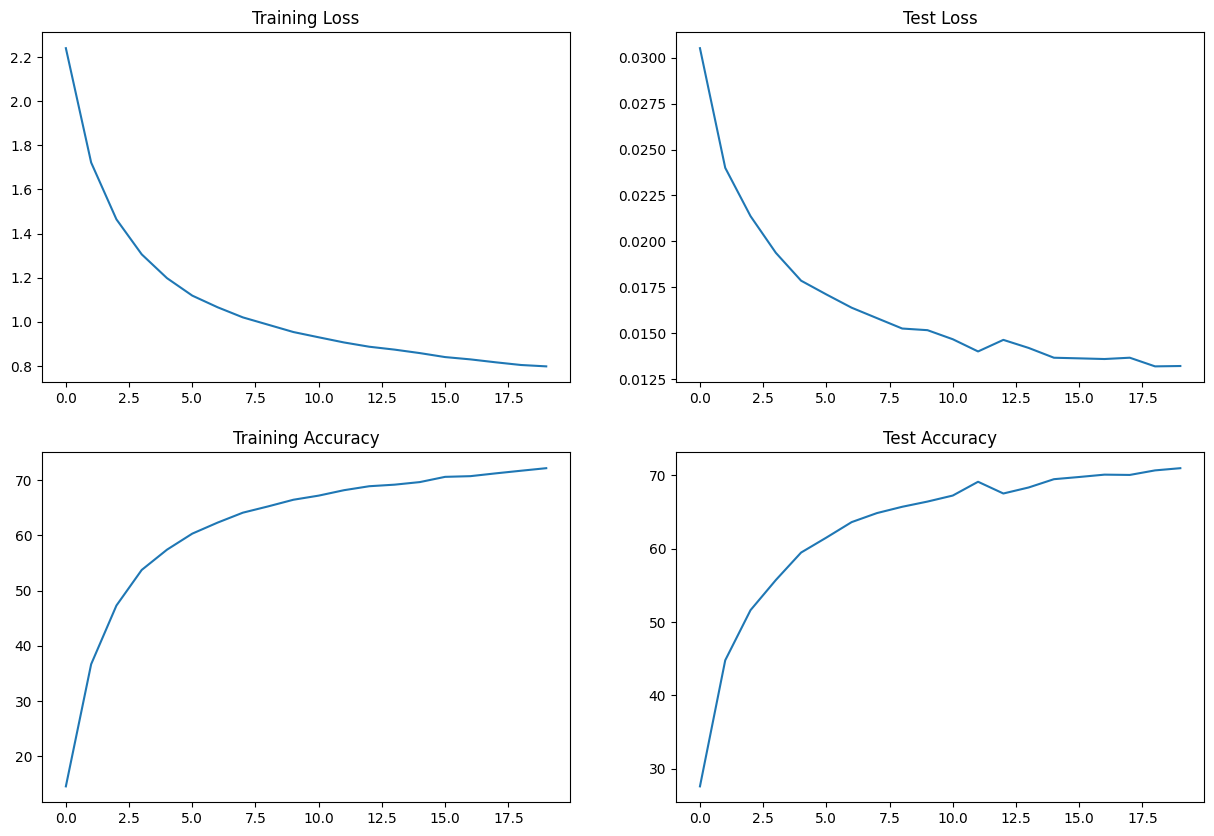

In [9]:
utils.plot_loss_accuracy()

Evaluation

Ground truth:

 horse  plane   frog    cat    dog
Predicted:

   dog  truck   frog    cat    dog


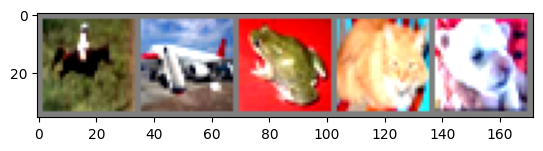

In [10]:
utils.model_evaluation(model=nn_model,device=device,test_loader=test_loader,test_batch_size=5)